## Depedency Import

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn import svm
from sklearn.metrics import accuracy_score
import opendatasets as od

## Datasets Loading

In [3]:
od.download('https://www.kaggle.com/datasets/ninzaami/loan-predication')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: imhatimkhan
Your Kaggle Key: ········


100%|██████████████████████████████████████████████████████████████████████████████| 7.83k/7.83k [00:00<00:00, 946kB/s]

In [84]:
dataset = pd.read_csv('loan-predication/train_u6lujuX_CVtuZ9i (1).csv')

In [85]:
type(dataset)

pandas.core.frame.DataFrame

In [86]:
dataset.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
319,LP002050,Male,Yes,1,Graduate,Yes,10000,0.0,155.0,360.0,1.0,Rural,N
149,LP001520,Male,Yes,0,Graduate,No,4860,830.0,125.0,360.0,1.0,Semiurban,Y
131,LP001473,Male,No,0,Graduate,No,2014,1929.0,74.0,360.0,1.0,Urban,Y
447,LP002435,Male,Yes,0,Graduate,NaN,3539,1376.0,55.0,360.0,1.0,Rural,N


In [87]:
dataset.shape

(614, 13)

In [88]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [89]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [90]:
dataset = dataset.dropna()
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [91]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [92]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


## Data Preprocessing

In [50]:
# le = LabelEncoder()
# le.fit(dataset['Loan_Status'])
# le.classes_
# dataset['Loan_Status'] = le.transform(dataset['Loan_Status'])

In [93]:
dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [94]:
dataset = dataset.replace(to_replace='3+' , value = 4)

In [95]:
dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [96]:
columns = ['Gender', 'Married', 'Self_Employed' , 'Education','Property_Area', 'Loan_Status']
for i in columns:
    le = LabelEncoder()
    le.fit(dataset[i])
    le.classes_
    dataset[i] = le.transform(dataset[i])

In [97]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


## Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

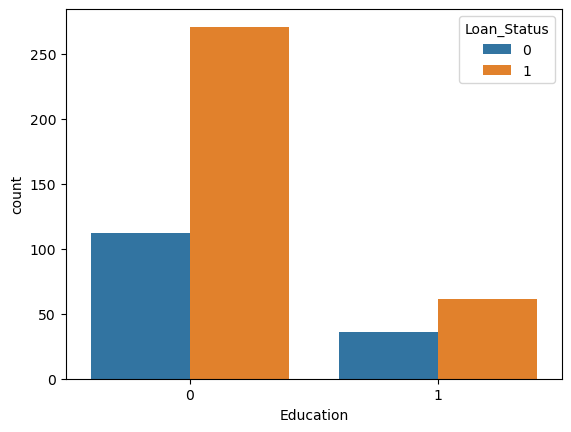

In [98]:
sns.countplot(x='Education', hue = 'Loan_Status', data = dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

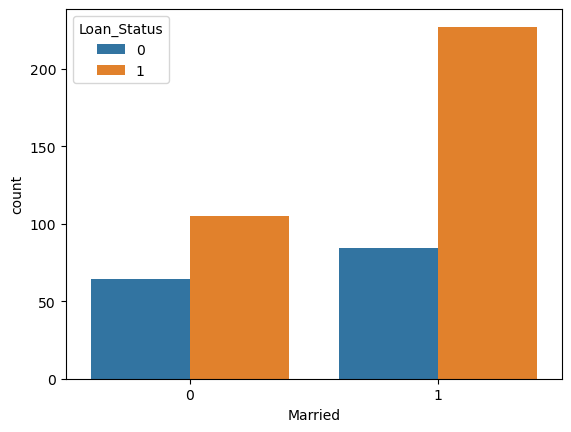

In [105]:
sns.countplot(x='Married',hue='Loan_Status',data=dataset)

In [99]:
# separating the data and label
X = dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = dataset['Loan_Status']

print(X.shape, y.shape)

(480, 11) (480,)


## Splitting Data into training and testing Data

In [100]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [101]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


## Model Tranining

In [102]:
clf = svm.SVC(kernel='linear')

In [103]:
clf.fit(X_train,y_train)

SVC(kernel='linear')

## Model testing & Prediction

In [106]:
X_train_prediction = clf.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,y_train)

In [107]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8020833333333334


In [108]:
X_test_prediction = clf.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,y_test)

In [109]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8229166666666666
